In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.keras.layers.MaxPool2D.__init__

<function tensorflow.python.keras.layers.pooling.MaxPooling2D.__init__(self, pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)>

In [3]:
image = tf.constant([[[[4],[3]],
                     [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='VALID')(image) # No Padding
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


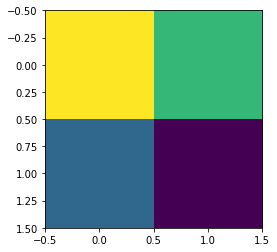

In [6]:
image = tf.constant([[[[4],[3]],
                     [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='SAME')(image) # Padding
print(pool.shape)
print(pool.numpy())
plt.imshow(pool.numpy().reshape(2, 2))

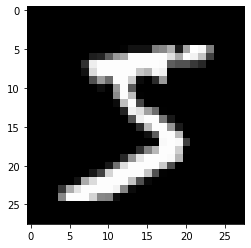

In [14]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

(1, 14, 14, 5)


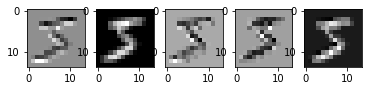

In [18]:
img = img.numpy().reshape(-1, 28, 28, 1) # [Batch, Hegiht, Width, Channel]
img = tf.convert_to_tensor(img) # numpy.nd_array --> tensor
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2, 2), padding='SAME', kernel_initializer=weight_init)(img)
print(conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 5, i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


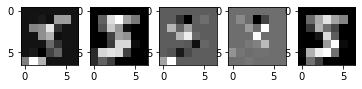

In [19]:
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 5, i+1), plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()